## Interpolation 

Une interpolation est une opération mathématique permettant de construire une courbe à partir des données d'un nombre fini de points, ou une fonction à partir de données d'un nombre fini de valeurs

In [3]:
from scipy.interpolate import interp1d
from scipy import optimize, signal, fftpack, ndimage
import numpy as np
import matplotlib.pyplot as plt

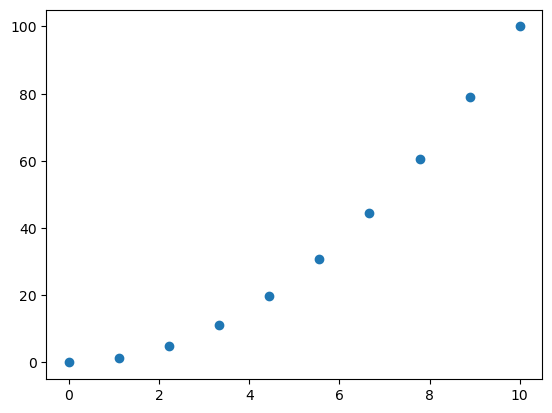

In [4]:
x = np.linspace(0, 10, 10)
y = x**2
plt.scatter(x, y)

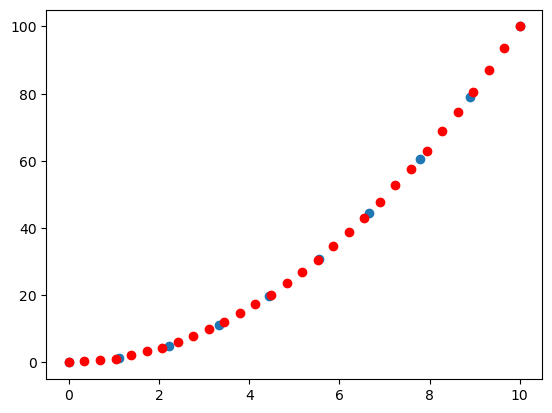

In [5]:
f = interp1d(x, y, kind =  'linear')

new_x = np.linspace(0,10,30)
r = f(new_x)

plt.scatter(x, y)
plt.scatter(new_x, r, c ='red')

## Optimisation

In [7]:
# Trouver le minimum d'une fonction

In [8]:
def f(x):
    return x**2 + 15*np.sin(x)

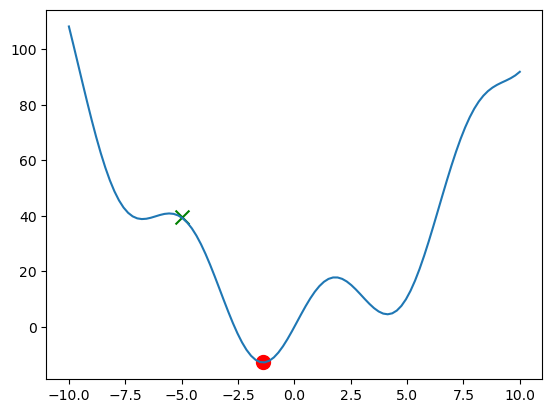

In [9]:
x = np.linspace(-10, 10, 100)
min = optimize.minimize(f, x0 = -5)["x"]
start = -5
plt.plot(x, f(x))
plt.scatter(min, f(min), c = 'red', s = 100, zorder = 1)
plt.scatter(start, f(start), marker = 'x', c = 'green', s = 100, zorder = 1)

## Traitement du signal

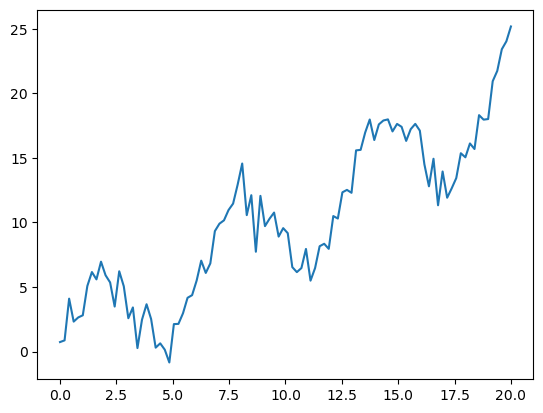

In [11]:
x = np.linspace(0, 20, 100)
y = x +4*np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x,y)

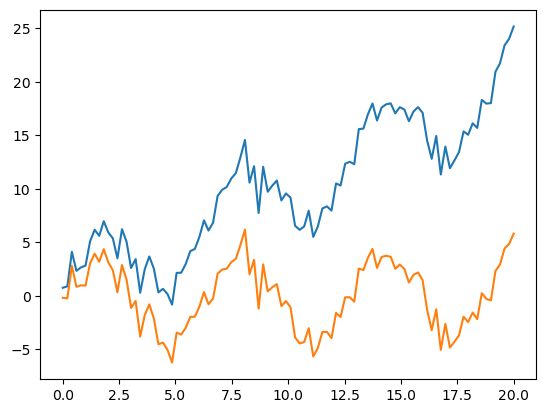

In [12]:
# Eliminer les tendances liniaire dans un signal
new_y = signal.detrend(y)
plt.plot(x,y)
plt.plot(x,new_y)

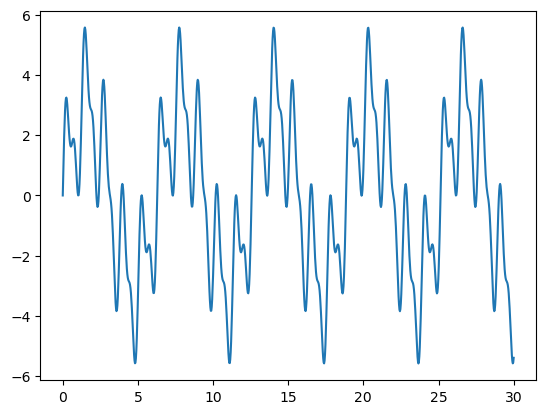

In [13]:
# Transformation de fourrier: Elle permet d'extraire les differentes frequences qui constituent un signal. Le resultat est un graphique 
# appélé spectre qui a en abcisse les frequences et en ordonnées les amplitide de chaque fréquence

x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) +np.sin(10*x)
plt.plot(x,y)

/home/merf/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/merf/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


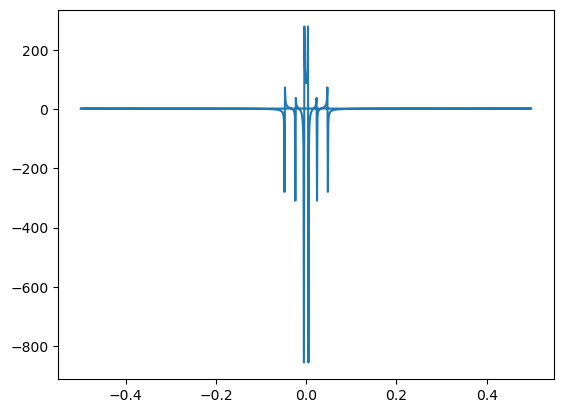

In [14]:
# Valeur négative, utilser les valeurs absolues

fourrier = fftpack.fft(y)
frequences =  fftpack.fftfreq(y.size)
plt.plot(frequences, fourrier)

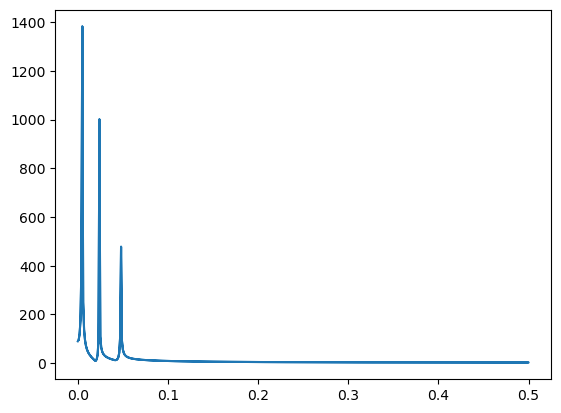

In [15]:
# On retrouve donc 3 frequences

fourrier = fftpack.fft(y)
frequences =  fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), np.abs(fourrier))

In [16]:
# On peut appliquer la transformation de fourrier pour nettoyer le bruit dans un signal

# Etape 1: Signal avec bruit
# Etape 2: Faire la transformation de fourrier pour produire le spectre du signal avec bruit
# Etape 3: Utiliser le boolean indexing pour eliminer les valeurs inferieur a un certain seuil dans ce spectre. On a un spectre nettoyé
# Etape 4: Utiliser la transformation de fourrier inverse sur le spectre nettoyé pour repasser dans le monde réel et avoir un signal clean

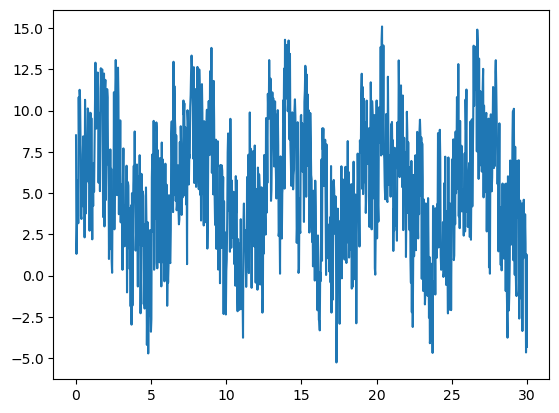

In [17]:
# Etape 1
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) +np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x, y)

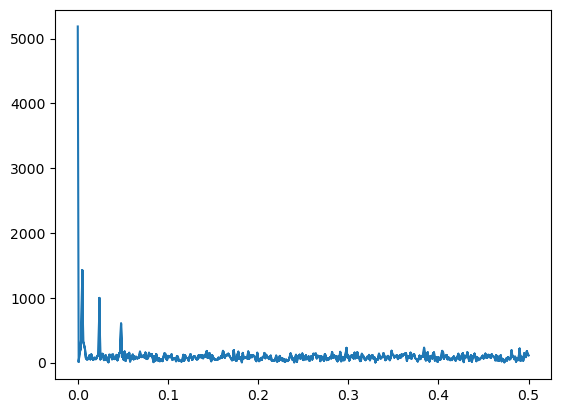

In [18]:
# Etape 2

fourrier = fftpack.fft(y)
power = np.abs(fourrier)
frequences =  fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)

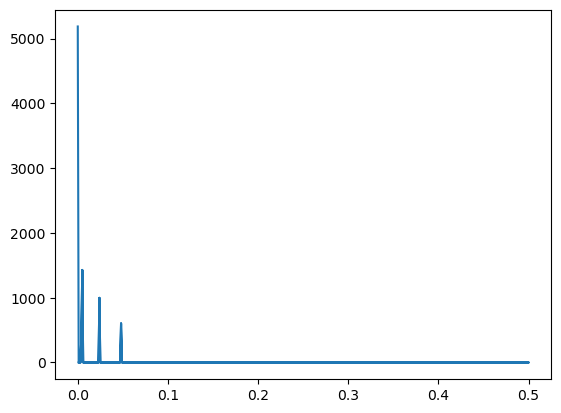

In [19]:
# Etape 3

fourrier[power < 400] = 0
plt.plot(np.abs(frequences), np.abs(fourrier))

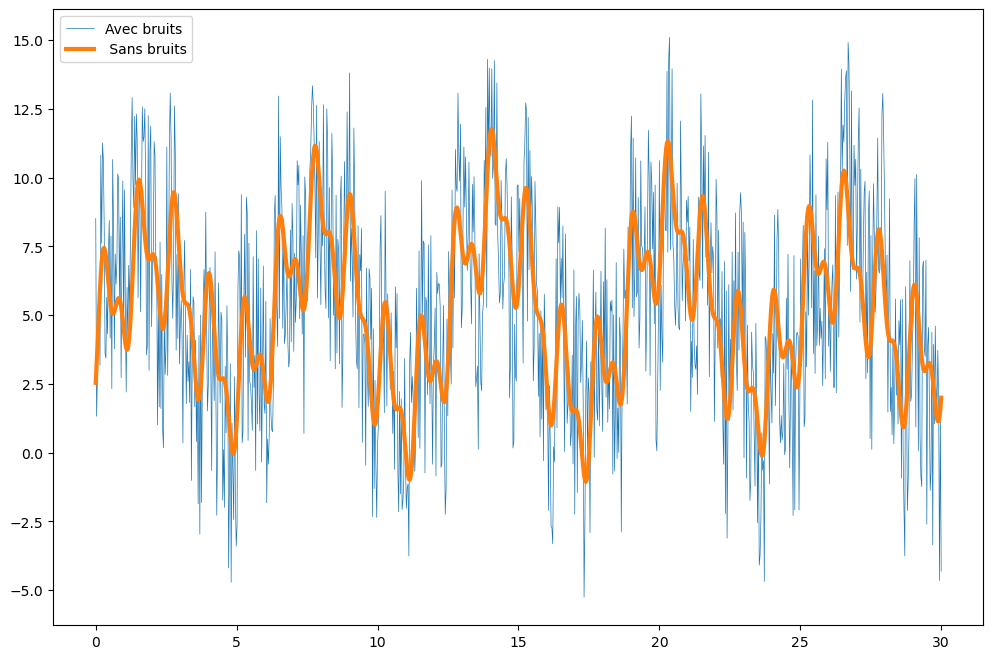

In [20]:
# Etape 4

fourrier_filtre = fftpack.ifft(fourrier)
plt.figure(figsize = (12,8))
plt.plot(x, y, lw = 0.5, label = 'Avec bruits')
plt.plot(x, fourrier_filtre, lw = 3, label = ' Sans bruits')
plt.legend()

## Traitement d'image

In [22]:
# Operation mrphologique: Dilatation & Erosion ___ Ouverture & Fermeture
# Ils peuvent etre utiliser pour enlever les petits artefacts qu'on a sur une image

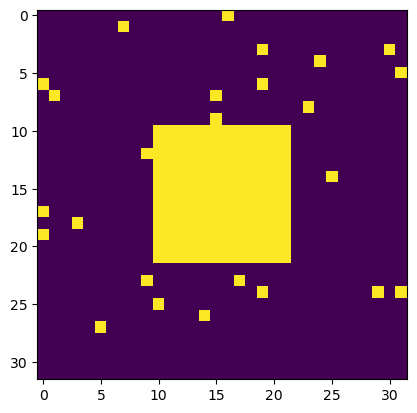

In [23]:
np.random.seed(0)
X = np.zeros((32,32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0, 32, 30), np.random.randint(0, 32, 30)] = 1
plt.imshow(X)

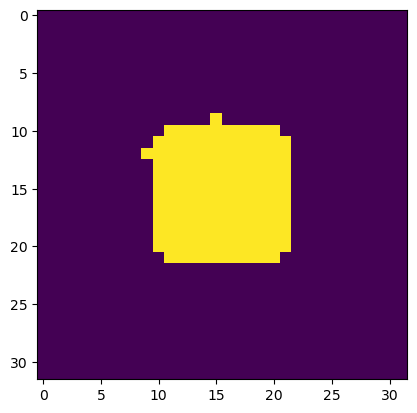

In [24]:
# Operation d'ouverture

ouverture_X = ndimage.binary_opening(X)
plt.imshow(ouverture_X)